In [1]:
from StockDescription import *
from Hedge import Hedge

import sys
sys.path.append('../../source/')

import numpy as np
import pandas as pd
stockuniverse = getStockUniverse()


In [11]:
import seaborn as sns
sns.set_context("poster")

In [2]:
techs = getSamplePortfolio(stockuniverse,sector=['Technology'])
consumer_durable = getSamplePortfolio(stockuniverse,sector=['Consumer Durables'])
energy = getSamplePortfolio(stockuniverse, sector=['Energy'])
health_care = getSamplePortfolio(stockuniverse, sector=['Health Care'])

*******Warning: insufficient candidates, reduce number of samples
Top 5 rows of selected portfolio:
     Symbol                                        Name  MarketCap  \
1062    PTC                                    PTC Inc.       3580   
1330   TECD                       Tech Data Corporation       2470   
1094     SQ                                Square, Inc.       3400   
568    QIHU               Qihoo 360 Technology Co. Ltd.       9280   
190    CTSH  Cognizant Technology Solutions Corporation      34680   

          Sector                                          industry  Market  
1062  Technology           Computer Software: Prepackaged Software  NASDAQ  
1330  Technology  Retail: Computer Software & Peripheral Equipment  NASDAQ  
1094  Technology           Computer Software: Prepackaged Software    NYSE  
568   Technology                                      EDP Services    NYSE  
190   Technology                                      EDP Services  NASDAQ  
*******Warning: i

In [13]:
hedge_tech = Hedge(begindate='2014-01-01', enddate='2014-12-31',fromlist=techs)
hedge_tech.market = hedge_tech.stockuniverse
tech_returns = hedge_tech.dollar_market_sum_ret
tech_port = hedge_tech.dollar_market_sum

In [14]:
hedge_consumer_durable = Hedge(begindate='2014-01-01', enddate='2014-12-31',fromlist=consumer_durable)
hedge_consumer_durable.market = hedge_consumer_durable.stockuniverse
consumer_durable_returns = hedge_consumer_durable.dollar_market_sum_ret
consumer_durable_port = hedge_consumer_durable.dollar_market_sum

In [15]:
hedge_health = Hedge(begindate='2014-01-01', enddate='2014-12-31',fromlist=health_care)
hedge_health.market = hedge_health.stockuniverse
health_returns = hedge_health.dollar_market_sum_ret
health_port = hedge_health.dollar_market_sum

In [16]:
hedge_energy = Hedge(begindate='2014-01-01', enddate='2014-12-31',fromlist=energy)
hedge_energy.market = hedge_energy.stockuniverse
energy_returns = hedge_energy.dollar_market_sum_ret
energy_port = hedge_energy.dollar_market_sum

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline


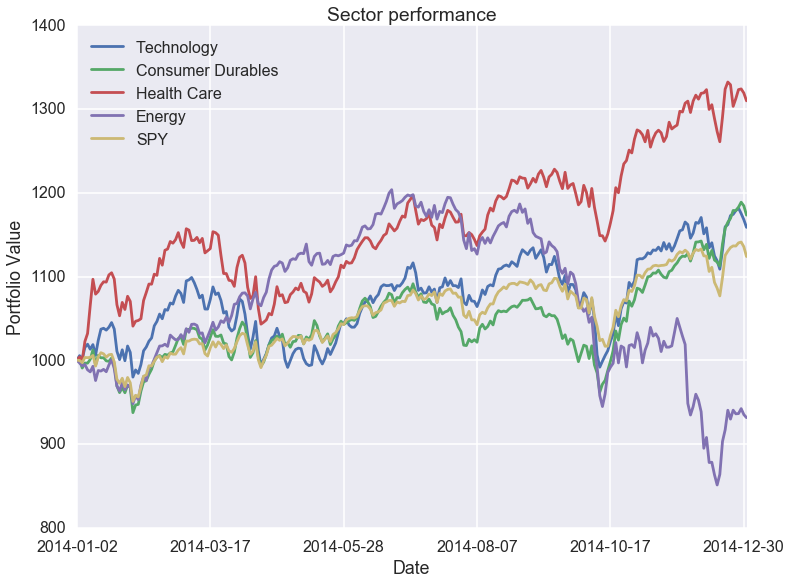

In [18]:
plt.figure(figsize=(12, 9))
tech_port.plot(label='Technology')
consumer_durable_port.plot(label='Consumer Durables')
health_port.plot(label='Health Care')
energy_port.plot(label='Energy')
(hedge_tech.spy/hedge_tech.spy.values[0]*1000).plot(label='SPY')
plt.legend(loc = 2)
plt.title("Sector performance")
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.savefig('Sector_13_14.png')